In [2]:
import os

In [4]:
token=os.getenv('ACCESS_TOKEN')
token_secret=os.getenv('ACCESS_TOKEN_SECRET')
consumer_key=os.getenv('CONSUMER_KEY')
consumer_secret=os.getenv('CONSUMER_SECRET')

In [5]:
import twitter
api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=token,
                  access_token_secret=token_secret,
                  #sleep_on_rate_limit=True
                )

In [6]:
api

# Tweeters using the Hashtag #shdb17

In [7]:
tweets = api.GetSearch(raw_query='q=%23shdb17&count=100&since_id=2017-10-01')
science_hack_tweeters = {tweet.user.id: tweet.user.screen_name for tweet in tweets}
science_hack_tweeters

{15772640: 'ramin__',
 19071614: 'hirbel',
 21995182: 'katausten',
 40774011: 'luizalbd',
 73082628: 'talknewvic',
 77477607: 'derjoram',
 99586343: 'lu_cyP',
 274071475: 'UCLbasc',
 700611380: 'rikunert',
 1243981704: 'katihappyy'}

# Followers of a user

In [8]:
followers_shd_berlin = api.GetFollowers(user_id='1531582164', total_count=5, skip_status=True)

In [9]:
followers_shd_berlin

[User(ID=922114111000936450, ScreenName=RJAston_Tech),
 User(ID=307615698, ScreenName=Cassandreces),
 User(ID=19071614, ScreenName=hirbel),
 User(ID=165745785, ScreenName=Mboathomas),
 User(ID=87736333, ScreenName=orensbruno)]

In [10]:
followers_shd_berlin[0].screen_name

'RJAston_Tech'

# Members of the SHDB17 Twitter list 
https://twitter.com/SHD_Berlin/lists/shd-berlin-2017

In [11]:
api.GetLists(user_id='1531582164')

[List(ID=928630046448848897, FullName='@SHD_Berlin/shd-berlin-2017', Slug=shd-berlin-2017, User=SHD_Berlin),
 List(ID=873203403538796544, FullName='@SHD_Berlin/shdb17-orga-team', Slug=shdb17-orga-team, User=SHD_Berlin),
 List(ID=779484881285963776, FullName='@SHD_Berlin/shd-berlin-2016', Slug=shd-berlin-2016, User=SHD_Berlin),
 List(ID=230990707, FullName='@SHD_Berlin/berlin-community', Slug=berlin-community, User=SHD_Berlin),
 List(ID=223103221, FullName='@SHD_Berlin/shd-berlin-2015', Slug=shd-berlin-2015, User=SHD_Berlin),
 List(ID=175486869, FullName='@SHD_Berlin/shd-berlin-2014', Slug=shd-berlin-2014, User=SHD_Berlin)]

In [12]:
science_hackers = {user.id: user.screen_name for user in api.GetListMembers(list_id='928630046448848897')}
science_hackers

{11712822: 'li5a',
 14947781: 'onna_no_hito',
 15772640: 'ramin__',
 19071614: 'hirbel',
 21492460: 'ellen_koenig',
 21995182: 'katausten',
 29342035: 'PCH_Intl',
 40774011: 'luizalbd',
 51757957: 'genekogan',
 77477607: 'derjoram',
 99586343: 'lu_cyP',
 165745785: 'Mboathomas',
 202275865: 'xMartin',
 226237233: 'arnejenssen',
 307615698: 'Cassandreces',
 326840157: 'dadafoto',
 333494575: 'meredityman',
 378694453: 'sarahhermanutz',
 1112710856: 'AravinthPanch',
 1243981704: 'katihappyy',
 1637049138: 'GoodpatchBerlin',
 2203330990: 'Rick_Scavetta',
 2675053819: 'giu_pap',
 2809668737: 'lukeidesign',
 2867007903: 'robertkovax',
 4414975041: 'Th_Heidtmann',
 715590200794222593: 'sciencejoram',
 804277319510724609: 'nbt_ag',
 819927704850038785: 'eLifeInnovation',
 821041513836724224: 'Volpato1985'}

In [13]:
all_users = {**science_hack_tweeters,  **science_hackers, **{1531582164:'Science Hack Day BLN'}}
len(all_users)

34

In [14]:
# Hack to limit the user list to 15

all_tweeters = list({**science_hack_tweeters,  **science_hackers}.items())

only_11_users = dict(all_tweeters[0:5])

only_11_users[1531582164]='Science Hack Day BLN'
only_11_users

{51757957: 'genekogan',
 73082628: 'talknewvic',
 1531582164: 'Science Hack Day BLN',
 715590200794222593: 'sciencejoram',
 819927704850038785: 'eLifeInnovation',
 821041513836724224: 'Volpato1985'}

# Build and visualize as simple NetworkX graph from the Twitter data

In [21]:
import networkx as nx

graph = None
graph = nx.DiGraph()

In [22]:
def add_shdb_related_followers_to_graph(graph, user_id, user_name, all_users):
    followers = api.GetFollowers(user_id=user_id, total_count=300, include_user_entities=False, skip_status=True)
    for follower in followers:
        if follower.id in all_users:
            graph.add_edge(follower.screen_name, user_name)

In [23]:
for user in only_11_users:
    print("user: ", only_11_users[user])
    add_shdb_related_followers_to_graph(graph, user, only_11_users[user], only_11_users)

user:  Volpato1985


TwitterError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

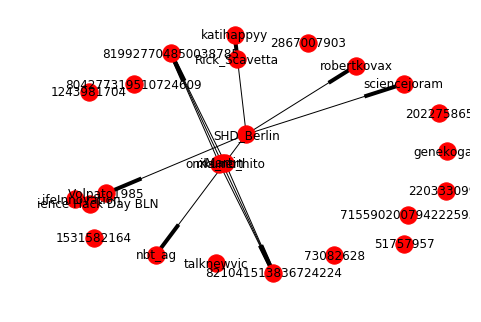

In [144]:
#plt.figure(figsize=(500, 500))
nx.draw(graph, with_labels=True)

# Next steps

 * get followers for all other users from the "all users" list
 * add edges to graph
 * Experiment with metrics to compute to get some interesting resutls

In [136]:
import pickle

pickle.dump(graph, open("basic_graph.p", "wb"))

In [139]:
graph.number_of_nodes()

14

In [140]:
graph.number_of_edges()

6